# 5.17 형태소분석

In [1]:
from nltk.tokenize import word_tokenize, sent_tokenize
import re
from string import punctuation

sentence = 'She sells seashells on the seashore.'

tokens = word_tokenize(sentence.lower())
tokens = [_ for _ in tokens if not re.search(r'[{0}]'.format(punctuation), _)]

tokens

['she', 'sells', 'seashells', 'on', 'the', 'seashore']

In [2]:
from nltk import pos_tag
from nltk.help import upenn_tagset

[_[0] for _ in pos_tag(tokens) if _[1] not in ['DT', 'IN']]

['she', 'sells', 'seashells', 'seashore']

In [3]:
import nltk

nltk.download('maxent_treebank_pos_tagger')
nltk.download('tagsets')

[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [4]:
upenn_tagset('IN'), upenn_tagset('DT')

IN: preposition or conjunction, subordinating
    astride among uppon whether out inside pro despite on by throughout
    below within for towards near behind atop around if like until below
    next into if beside ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those


(None, None)

In [5]:
from nltk.corpus import gutenberg

corpus = gutenberg.open('austen-emma.txt').read()
posTags = pos_tag(word_tokenize(corpus.lower()))

In [6]:
from nltk import Text
import matplotlib.pyplot as plt

Text([_[1] for _ in posTags]).plot(30)

<Figure size 640x480 with 1 Axes>

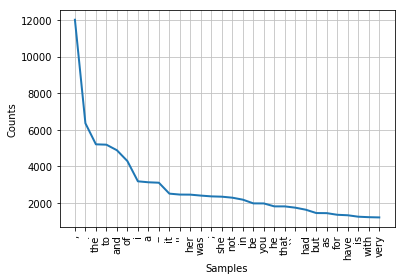

In [7]:
Text([_[0] for _ in posTags]).plot(30)

In [8]:
sentence = 'The little yellow dog barked at the Persian Cat'

tokens = word_tokenize(sentence.lower())
tokens = [_ for _ in tokens if not re.search(r'[{0}]'.format(punctuation), _)]

tokens, \
[_[0] for _ in pos_tag(tokens) if _[1] not in ['DT', 'IN']]

(['the', 'little', 'yellow', 'dog', 'barked', 'at', 'the', 'persian', 'cat'],
 ['little', 'yellow', 'dog', 'barked', 'persian', 'cat'])

### 형태소 분석기 마다 성능 차이가 있고 장,단점이 존재
### Mecab은 Window 환경에서 구동 X

In [14]:
# 띄어쓰기 성능
sentence1 = '아버지가방에들어가신다.'
# 형태소 분석
sentence2 = '아버지가 방에 들어가신다.'
# 신조어/비속어
sentence3 = '아이폰 갤럭시 안드로이드 창렬하다 혜자스럽게'

In [16]:
from konlpy.tag import Hannanum # 한나눔(KAIST)

hannanum = Hannanum()
print(hannanum.pos(sentence1))
print(hannanum.pos(sentence2))
print(hannanum.pos(sentence3))

[('아버지가방에들어가', 'N'), ('이', 'J'), ('시ㄴ다', 'E'), ('.', 'S')]
[('아버지', 'N'), ('가', 'J'), ('방', 'N'), ('에', 'J'), ('들', 'P'), ('어', 'E'), ('가', 'P'), ('시ㄴ다', 'E'), ('.', 'S')]
[('아이폰', 'N'), ('갤럭시', 'N'), ('안드로이드', 'N'), ('창렬하다', 'N'), ('혜자스럽', 'N'), ('게', 'J')]


In [17]:
from konlpy.tag import Kkma # 꼬꼬마 (서울대)

ma = Kkma()

print(ma.pos(sentence1))
print(ma.pos(sentence2))
print(ma.pos(sentence3))

[('아버지', 'NNG'), ('가방', 'NNG'), ('에', 'JKM'), ('들어가', 'VV'), ('시', 'EPH'), ('ㄴ다', 'EFN'), ('.', 'SF')]
[('아버지', 'NNG'), ('가', 'JKS'), ('방', 'NNG'), ('에', 'JKM'), ('들어가', 'VV'), ('시', 'EPH'), ('ㄴ다', 'EFN'), ('.', 'SF')]
[('아이', 'NNG'), ('폰', 'NNG'), ('개', 'VV'), ('ㄹ', 'ETD'), ('럭', 'UN'), ('시', 'NNG'), ('안', 'NNG'), ('드로', 'NNG'), ('이드', 'NNG'), ('창', 'NNG'), ('렬', 'UN'), ('하', 'XSV'), ('다', 'ECS'), ('혜', 'UN'), ('자', 'NNG'), ('스럽', 'XSA'), ('게', 'ECD')]


In [18]:
from konlpy.tag import Komoran

komoran = Komoran()

print(komoran.pos(sentence1))
print(komoran.pos(sentence2))
print(komoran.pos(sentence3))

[('아버지', 'NNG'), ('가방', 'NNP'), ('에', 'JKB'), ('들어가', 'VV'), ('시', 'EP'), ('ㄴ다', 'EF'), ('.', 'SF')]
[('아버지', 'NNG'), ('가', 'JKS'), ('방', 'NNG'), ('에', 'JKB'), ('들어가', 'VV'), ('시', 'EP'), ('ㄴ다', 'EF'), ('.', 'SF')]
[('아이폰', 'NNP'), ('갤럭시', 'NNP'), ('안드로이드', 'NNP'), ('창려', 'NNP'), ('ㄹ', 'JKO'), ('하', 'VV'), ('다', 'EC'), ('혜자', 'NNP'), ('스럽', 'XSA'), ('게', 'EC')]


In [20]:
from konlpy.tag import Okt # Twitter

okt = Okt()
print(okt.pos(sentence1))
print(okt.pos(sentence2))
print(okt.pos(sentence3))

[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb'), ('.', 'Punctuation')]
[('아버지', 'Noun'), ('가', 'Josa'), ('방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb'), ('.', 'Punctuation')]
[('아이폰', 'Noun'), ('갤럭시', 'Noun'), ('안드로이드', 'Noun'), ('창렬하', 'Noun'), ('다', 'Josa'), ('혜자', 'Noun'), ('스럽게', 'Josa')]


# 한글 형태소 분석기 성능
## 띄어쓰기 성능 : Kkma = Komoran > Okt > Hannanum
## 형태소 분석 성능 :
### (문어체) Kkma = Komoran > Hannanum > Okt
### (구어체) Komoran > Okt = Hannanum > Kkma

In [21]:
from konlpy.corpus import kolaw

corpus = kolaw.open(kolaw.fileids()[0]).read()

In [22]:
tokens = list()
for sentence in sent_tokenize(corpus):
    tokens.extend(word_tokenize(sentence))

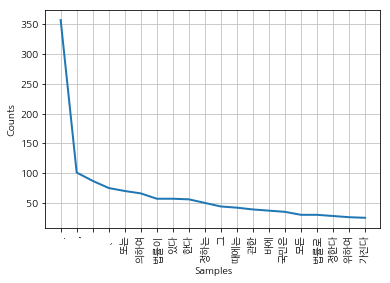

In [25]:
from matplotlib import rc, font_manager
path = "c:/Windows/Fonts/NanumGothic.ttf"
font = font_manager.FontProperties(fname=path).get_name()
rc("font", family=font)

Text(tokens).plot(20)